#### Script `DesafioEtl`
Esse script serve como um ponto de partida para a implementação de um pipeline ETL (Extração, Transformação e Carga). O objetivo é fornecer uma estrutura para:

1. **Extrair dados** da fonte `googleplaystore.csv`.
2. **Transformar os dados** conforme necessário para a análise ou processamento posterior.
3. **Carregar os dados** transformados em um destino apropriado, quando necessário.

Além disso, esse script pode incluir métodos para cada uma dessas etapas do processo ETL, assim como manipulação de erros e logging para garantir um processamento de dados robusto e eficiente.


#### Importação das bibliotecas
- **logging:** Biblioteca para registrar mensagens de erro e informações do sistema.
- **pandas:** Biblioteca para manipulação e análise de dados, oferecendo estruturas de dados rápidas e flexíveis.
- **matplotlib:** Biblioteca para criação de gráficos e visualizações de dados.
- **FuncFormatter:** Função do matplotlib para formatação customizada de rótulos em gráficos.

In [845]:
import logging
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import FuncFormatter

#### Método `abrir_arquivo`
Este método é responsável por abrir um arquivo CSV especificado pelo usuário, utilizando o método `read_csv` do pandas. Ele tenta carregar os dados do arquivo e retorna um DataFrame, outro ponto importante é a utilização do with, para garantir que o arquivo seja fechado após carregar os dados.


In [846]:
def abrir_arquivo(nome_arquivo):
    try:
        with open(nome_arquivo, 'r') as file:
            dados = pd.read_csv(file)
        return dados
    except Exception as ex:
        logging.error(f"Erro ao abrir o arquivo: {ex}")
        raise

#### Método `criar_data_frame`
Este método é responsável por criar um DataFrame pandas a partir de dados fornecidos. Ele utiliza uma lista de colunas predefinidas para estruturar o DataFrame.


In [847]:
def criar_data_frame(dados):
    try:
        colunas = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
                   'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
                   'Android Ver']
        
        data_frame = pd.DataFrame(dados, columns=colunas)
        
        return data_frame
    except Exception as ex:
        logging.error(f"Erro, criar_data_frame: {ex}")
        raise

#### Método `remover_duplicates`
Este método remove as duplicata, ordenando primeiro o dados pala data de atualização e em seguida pegando apenas a primeira ocorrencia de cada app. Resposta do tópico 1 do desafio.

- Filtra buscando apenas o dados em que a coluna `Last Uodated` está corretamente preenchida.
- Utilizando  o metodo `to_datetime` do pandas, converte a data para formato numerico.
- Utiliza o método `sort_values`, para ordenar de forma decrescente os dados pela ordem de atualização.
- Utiliza o método `drop_duplicates`, para manter somente um app de cada pelo nome.

Por fim, retorna o data_frame sem app repetidos.


In [848]:
def remover_duplicatas( data_frame):
        try:
            # Filtra linhas onde 'Last Updated' é 'Free'
            data_frame = data_frame[data_frame['Last Updated'] != 'Free']

            # Converter a coluna 'Last Updated' para o tipo de dados de data
            # Ignora erros de conversão com 'errors="coerce"' para transformar datas inválidas em NaT
            data_frame['Last Updated'] = pd.to_datetime(data_frame['Last Updated'], format="%B %d, %Y", errors='coerce')

            # Ordena o DataFrame pela coluna 'Last Updated' em ordem decrescente
            data_frame = data_frame.sort_values(by='Last Updated', ascending=False)

            # Remove duplicatas mantendo apenas a entrada mais recente
            apps_unicos = data_frame.drop_duplicates(subset=['App'], keep='first')

            return apps_unicos
        except Exception as ex:
            logging.error(f"Erro, remover_duplicatas: {ex}")
            raise

#### Método `preencher_remover_nan`
Este método trata valores ausentes (NaN) em um DataFrame. Ele utiliza as seguintes operações:

- O método `.loc` é usado aqui para acessar todas as linhas (`:`) da coluna `Rating` e, em seguida, o método `fillna` é aplicado para preencher os valores ausentes com 0.0.
- Utiliza o método `dropna` para remover as linhas que contêm valores ausentes nas colunas `Content Rating`, `Type`, `Current Ver` e `Android Ver`.

Após essas operações, o método retorna o DataFrame corrigido.

In [849]:
def preencher_remover_nan(data_frame):
    try:
        data_frame.loc[:, 'Rating'] = data_frame['Rating'].fillna(0.0)

        data_frame = data_frame.dropna(subset=['Content Rating', 'Type', 'Current Ver', 'Android Ver'])

        return data_frame
    except Exception as ex:
        logging.error(f"Erro, preencher_remover_nan: {ex}")
        raise

#### Método `data_frame_info`
Este método utiliza a função `info` do pandas, para trazer informações do dataframe, como quantidade de dados em cada coluna e tipo de dados, o segundo ponto do metodo `data_frame.isnull().sum()`, soma a quantidade de valores nulos por coluna de dados.


In [850]:
def data_frame_info(data_frame):
    try:
        data_frame.info()
        print(data_frame.isnull().sum())
    except Exception as ex:
        logging.error(f"Erro, data_frame_info: {ex}")
        raise

#### Método `formatar_converter_atributos`
Este método formata e converte os valores dos atributos do DataFrame. Ele utiliza as seguintes operações:

- Utiliza o método`str.replace` para formatar strings.
- Utiliza o método `astype` para alterar o tipo do dado do campo específico.

Após essas operações, o método retorna o DataFrame corrigido.

In [851]:
def formatar_converter_atributos(data_frame):
    try:
        data_frame.loc[:, 'Installs'] = data_frame['Installs'].str.replace('+', '', regex=False)
        data_frame.loc[:, 'Installs'] = data_frame['Installs'].str.replace(',', '', regex=False)
        data_frame.loc[:, 'Installs'] = data_frame['Installs'].astype(int)

        data_frame.loc[:, 'Price'] = data_frame['Price'].str.replace('$', '', regex=False)
        data_frame.loc[:, 'Price'] = data_frame['Price'].astype(float)
        
        data_frame.loc[:, 'Reviews'] = data_frame['Reviews'].astype(int)
        
        data_frame.loc[:, 'Rating'] = data_frame['Rating'].astype(float)
        
        return data_frame
    except Exception as ex:
        logging.error(f"Erro, formatar_converter_atributos: {ex}")
        raise

#### Método `salvar_resultado_txt`
Este método salva o resultado dos métodos, quando executado em um arquivo txt, no mesmo diretório em que está sendo executado o script DesafioEtl.


In [852]:
def salvar_resultado_txt(nome_arquivo_saida, dados):
    try:
        with open(nome_arquivo_saida+'.txt', 'w', encoding='utf-8') as arquivo_saida:
            arquivo_saida.write(f"{dados}\n")
    except Exception as ex:
        logging.error(f"Erro, salvar_resultado_txt: {ex}")
        raise

#### Método `grafico_coluna_top_5_instalacoes`
Este método gera um gráfico de coluna com os top 5 aplicativos por número de instalações. Respondendo o tópico 2 do desafio.

In [853]:
def grafico_coluna_top_5_instalacoes(data_frame):
    try:
        # Ordena o DataFrame pela coluna 'Installs' em ordem decrescente
        df_sorted = data_frame.sort_values(by='Installs', ascending=False)

        # Seleciona os top 5 aplicativos
        top_5_apps = df_sorted.head(5)

        # Extrai os nomes dos aplicativos e os números de instalações
        app_names = top_5_apps['App'].to_list()
        install_counts = top_5_apps['Installs'].to_list()

        # Cria o gráfico de barras
        plt.figure(figsize=(10, 6))
        plt.bar(app_names, install_counts, color='green')
        plt.xlabel("Nome dos Apps")
        plt.ylabel('Número de Instalações')
        plt.title('Top 5 Apps por Número de Instalações')
        plt.xticks(rotation=45, ha='right')
        
        # Utiliza o metodo formatar_milhoes, para corrigir o erro de exibição do grande volume de dados no gráfico
        plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhoes))
        plt.tight_layout()

        # Plota o gráfico
        plt.show()

    except Exception as ex:
        logging.error(f"Erro, grafico_coluna_top_5_instalacoes: {ex}")
        raise

#### Método `formatar_milhoes`
Este método format a string de valores, para ser utilziado nos gráfico, aterando o 'erro' para um resultado usual.

In [854]:
def formatar_milhoes(val, pos):
    try:
        if val >= 1e9:
            return f'{val / 1e9:.1f}B'
        else:
            return f'{val / 1e6:.1f}M'
    except Exception as ex:
        logging.error(f"Erro, formatar_milhoes: {ex}")
        raise

#### Método `grafico_pizza_frequencia_categorias`
Este método gera um gráfico de pizza com os catregorias dos aplicativos. Respondendo o tópico 3 do desafio.

In [855]:
def grafico_pizza_frequencia_categorias(data_frame):
    try:
        # Conta o número de ocorrências de cada categoria
        category_counts = data_frame['Category'].value_counts()

        # Seleciona as 16 principais categorias e agrupa as restantes em uma categoria chamada "Outras"
        top_categories = category_counts.head(16)
        other_categories_count = category_counts.iloc[16:].sum()
        top_categories['Outras'] = other_categories_count

        # Cria uma lista de rótulos da legenda formatados com nome da categoria e porcentagem
        legend_labels = [f"{category}: {count / data_frame.shape[0] * 100:.1f}%" for category, count in top_categories.items()]

        # Criar o gráfico de pizza principal
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Gráfico de pizza principal
        patches, texts, autotexts = ax1.pie(top_categories, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
        ax1.axis('equal')
        ax1.set_title('Distribuição das Categorias')

        # Adiciona a legenda ao lado do gráfico de pizza principal
        ax1.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Categorias")

        # Gráfico de pizza para as categorias "Outras"
        other_categories = category_counts.iloc[16:]
        other_legend_labels = [f"{category}: {count / data_frame.shape[0] * 100:.1f}%" for category, count in other_categories.items()]
        ax2.pie(other_categories, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
        ax2.axis('equal')
        ax2.set_title('Outras Categorias')
        ax2.legend(other_legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Outras Categorias")

        # Mostra os gráficos
        plt.tight_layout()
        plt.show()

    except Exception as ex:
        logging.error(f"Erro, grafico_pizza_frequencia_categorias: {ex}")
        raise


#### Método `app_mais_caro`
Este método gera um dataFrame contendo o valor do app pago mais caro e retorna esse valor. Respondendo ao tópico 4 do desagio. 

In [856]:
def app_mais_caro(data_frame):
    try:
        # Ordena o DataFrame pela coluna 'Price' em ordem decrescente
        df_sorted = data_frame.sort_values(by='Price', ascending=False)

        # Seleciona o aplicativo mais caro
        app_mais_caro = df_sorted.iloc[0]

        # Extrai o nome e o valor do aplicativo mais caro
        nome_app = app_mais_caro['App']
        valor = app_mais_caro['Price']

        # Formata a string de resultado
        resultado = f"O app com o maior valor no dataset é o {nome_app}, com o valor de ${valor}."

        return resultado
    except Exception as ex:
        logging.error(f"Erro, app_mais_caro: {ex}")
        raise


#### Método `numero_apps_mature_17`
Este método gera uma string contendo o valor da quantidade de aplicativos com a indicação de `Mature 17+` e retorna esse valor. Respondendo ao tópico 5 do desagio. 

In [857]:
def numero_apps_mature_17(data_frame):
    try:
        # Filtra o DataFrame para incluir apenas os aplicativos com a classificação 'Mature 17+'
        mature_17_count = data_frame[data_frame['Content Rating'] == 'Mature 17+'].shape[0]
        
        # Formata o resultado
        resultado = f"Quantidade de apps com classificação 'Mature 17+': {mature_17_count}."
        return resultado
    except Exception as ex:
        logging.error(f"Erro, numero_apps_mature_17: {ex}")
        raise

#### Método `top_10_aplicativos_reviews`
Este método gera uma dataframe contendo os 10 aplicativos que mais possuem reviews, ordenados de forma decrescente e retorna seu resultado. Respondendo ao tópico 6 do desagio. 

In [858]:
def top_10_aplicativos_reviews(data_frame):
    try:
        # Ordena o DataFrame pela coluna 'Reviews' em ordem decrescente
        df_sorted = data_frame.sort_values(by='Reviews', ascending=False)

        # Seleciona os top 10 aplicativos
        top_10_apps = df_sorted.head(10)

        # Cria um novo DataFrame com o nome do aplicativo e a quantidade de reviews
        df_top_apps = pd.DataFrame({
            'App': top_10_apps['App'],
            'Reviews': top_10_apps['Reviews']
        })

        return df_top_apps
    except Exception as ex:
        logging.error(f'Erro, top_10_aplicativos_reviews: {ex}')
        raise

#### Método `top_10_apps_avaliados`
Este método gera uma dataframe contendo os 10 aplicativos mais bem avaliados, ordenados de forma decrescente e retorna seu resultado. Respondendo ao tópico 7 do desagio. 

In [859]:
def top_10_apps_avaliados(data_frame):
    try:
        # Ordena o DataFrame pela coluna 'Reviews' em ordem decrescente
        df_sorted = data_frame.sort_values(by='Rating', ascending=False)

        # Seleciona os top 10 aplicativos
        top_10_apps = df_sorted.head(10)

        # Cria um novo DataFrame com o nome do aplicativo e o valor do Rating
        df_top_apps = pd.DataFrame({
            'App': top_10_apps['App'],
            'Rating': top_10_apps['Rating']
        })

        return df_top_apps
    except Exception as ex:
        logging.error(f'Erro, top_10_apps_avaliados: {ex}')
        raise

#### Método `quantidade_apps_pagos`
Este método retorna uma string onde mostra a quantidade de apps pagos que o dataset possui e sua porcentagem em relação ao total de aplicativos. Respondendo ao tópico 7 do desagio. 

In [860]:
def quantidade_apps_pagos(data_frame):
    try:
        # Contagem de apps e pagos
        apps_pagos = (data_frame['Type'] == 'Paid').sum()

        # Total de apps
        total_apps = len(data_frame)

        # Porcentagem de apps pagos em relação ao total
        porcentagem_apps_pagos = (apps_pagos / total_apps) * 100

        # Mensagem formatada
        mensagem = f"Quantidade de apps pagos: {apps_pagos}, em porcentagem do total: {porcentagem_apps_pagos:.2f}%"

        return mensagem
    except Exception as ex:
        logging.error(f'Erro, quantidade_apps_pagos: {ex}')
        raise

#### Método `grafico__dispersao_app_updates`
Este método gera um gráfico de dispersao, com a relação de apps e atualização por ano.

In [861]:
def grafico_dispersao_app_updates(data_frame):
    try:
        # Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
        df = data_frame.copy()

        # Converter a coluna 'Last Updated' para o tipo de dados de data
        df['Last Updated'] = pd.to_datetime(df['Last Updated'])

        # Extrair o ano da coluna 'Last Updated'
        df['Year'] = df['Last Updated'].dt.year

        # Contagem de atualizações por ano
        atualizacoes_por_ano = df['Year'].value_counts().sort_index()

        # Criar o gráfico de dispersão
        plt.figure(figsize=(10, 6))
        plt.scatter(atualizacoes_por_ano.index, atualizacoes_por_ano.values, color='blue')
        plt.xlabel('Ano de Atualização')
        plt.ylabel('Quantidade de Atualizações')
        plt.title('Quantidade de Atualizações por Ano')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        # Plota o gráfico
        plt.show()
    except Exception as ex:
        logging.error(f'Erro, grafico_dispersao_app_updates: {ex}')
        raise

#### Método `grafico_linha_genero_instalacoes`
Este método gera um gráfico de linha, que estabelece a relação de genero e quantidade de instalações.

In [862]:
def grafico_linha_genero_instalacoes(data_frame):
    try:
        # Agrupa o DataFrame pela coluna 'Genres' e somar as instalações
        df_grouped = data_frame.groupby('Genres')['Installs'].sum().reset_index()

        # Ordena o DataFrame agrupado pelo número de instalações em ordem decrescente
        df_sorted = df_grouped.sort_values(by='Installs', ascending=False)

        # Seleciona os top 5 gêneros
        top_5_genres = df_sorted.head(5)

        # Reordena os dados em ordem crescente para o gráfico da esquerda para a direita
        top_5_genres_sorted = top_5_genres.sort_values(by='Installs')

        # Extrai os nomes dos gêneros e os números de instalações
        genre_names = top_5_genres_sorted['Genres'].to_list()
        install_counts = top_5_genres_sorted['Installs'].to_list()

        # Cria o gráfico de linha
        plt.figure(figsize=(10, 6))
        plt.plot(genre_names, install_counts, marker='o', color='green')
        # Utiliza o metodo formatar_milhoes, para corrigir o erro de exibição do grande volume de dados no gráfico
        plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhoes))
        plt.xlabel('Gênero')
        plt.ylabel('Número de Instalações')
        plt.title('Número de Instalações dos 5 Principais Gêneros')
        plt.xticks(rotation=45)
        plt.tight_layout()
        # Plota o gráfico
        plt.show()

    except Exception as ex:
        logging.error(f'Erro, grafico_linha_genero_instalacoes: {ex}')
        raise

### Bloco de Execução Main
Este bloco executa passo a passo a resolução do desafio, utilizando a classe `DesafioEtl` e seus métodos para processar e analisar os dados do arquivo `googleplaystore.csv`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Pr

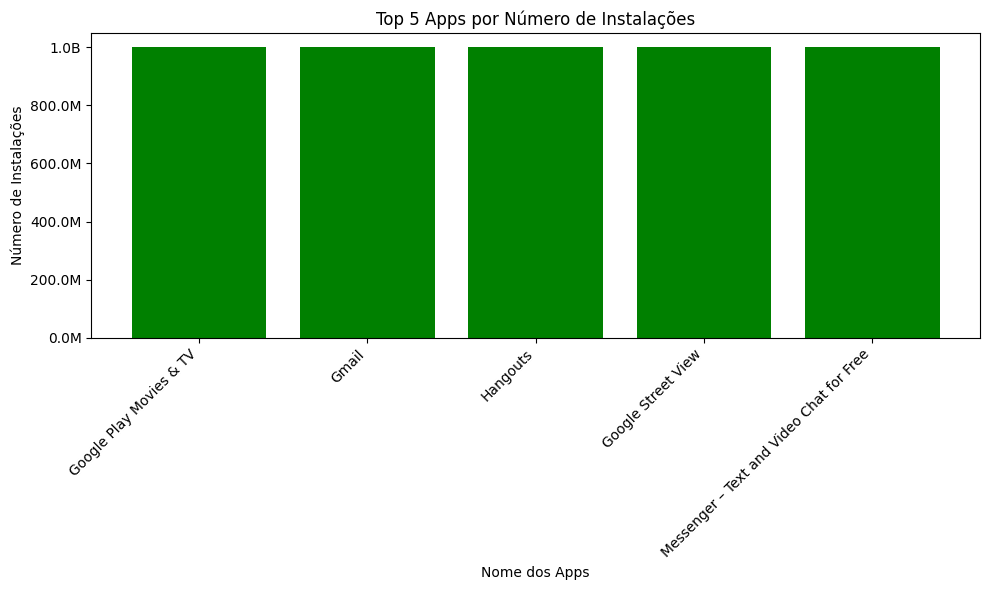

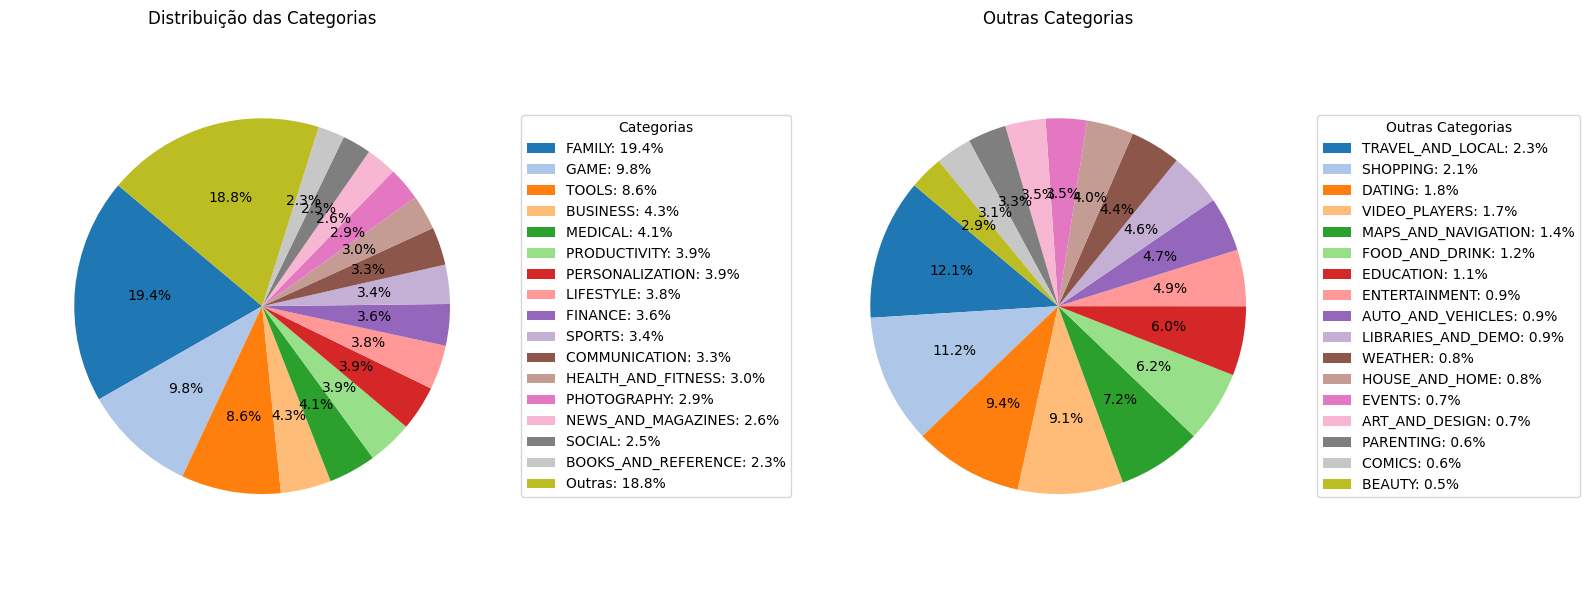

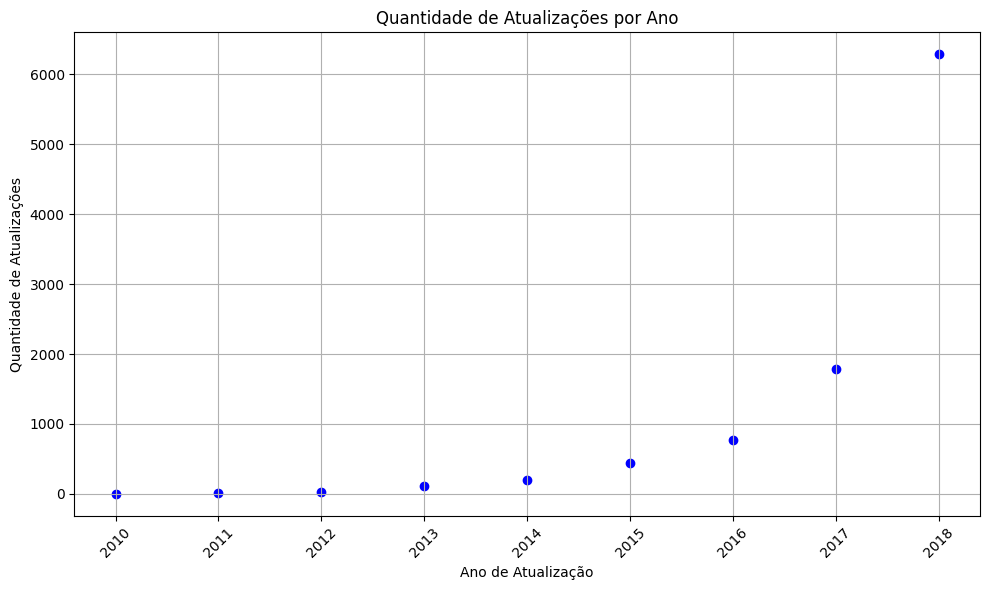

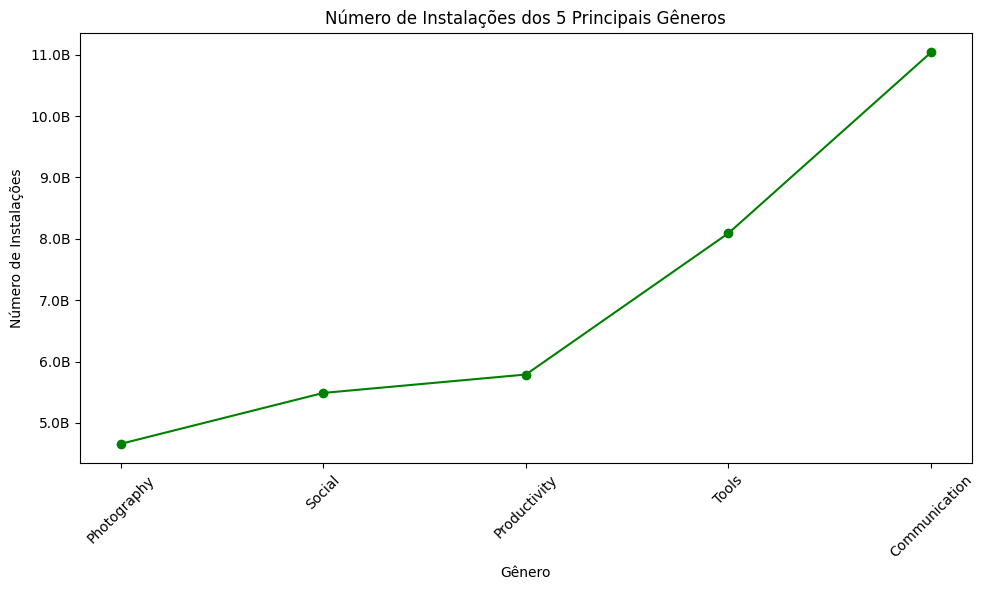

In [863]:
if __name__ == '__main__':
       
    # utiliza o arquivo googleplaystore para coleta de dados
    dados = abrir_arquivo('googleplaystore.csv')
    
    # cria o dataframe
    data_frame = criar_data_frame(dados)
    
    # retorna as informações iniciais do data frame
    data_frame_info(data_frame)
    
      # remove as duplicatas, topico 1 do desafio
    data_frame_unicos = remover_duplicatas(data_frame)
    
    # prrenche e remove as colunas NaN
    dados_sem_nan = preencher_remover_nan(data_frame_unicos)
    
    # converte os atributos que serão utilizados para um formato adequado
    dados_corrigidos = formatar_converter_atributos(dados_sem_nan)
    

    # exibe as informações do dataset, corrigido
    data_frame_info(dados_corrigidos)

    # plota o gráfico de coluna dos top 5 apps por numero de  instalação, tópico 2 do desafio
    grafico_top_5 = grafico_coluna_top_5_instalacoes(dados_corrigidos)
    
    # plota o gráfico de pizza das categorias dos apps, tópico 3 do desafio
    grafico_categoria = grafico_pizza_frequencia_categorias(dados_corrigidos)
    
    # coleta o app mais caro do dataset, tópico 4 do desafio
    app_mais_caro = app_mais_caro(dados_corrigidos)
    # salva o resultado no txt de nome app_mais_caro
    salvar_resultado_txt('app_mais_caro', app_mais_caro)

    # Coleta a informação de numeros de apps com indicação mature 17 +, tópico 5 do desafio
    quant_app_mature_17 = numero_apps_mature_17(dados_corrigidos)
    # salva o resultado no txt de nome app_mature_17
    salvar_resultado_txt('app_mature_17', quant_app_mature_17)

    # Coleta a informação dos 10 apps com maior numero de reviews, Tópico 6 do desafio
    top_10_reviews = top_10_aplicativos_reviews(dados_corrigidos)
    # salva o resultado no txt de nome top_10_reviews
    salvar_resultado_txt('top_10_reviews', top_10_reviews)
    
    # Coleta a informação dos top 10 apps mais bem avaliados, tópico 7 do desafio 
    top_10_apps_avaliados = top_10_apps_avaliados(dados_corrigidos)
    # salva o resultado no txt de nome top_10_avaliados
    salvar_resultado_txt('top_10_avaliados', top_10_apps_avaliados)
    
    # Coelta a informação da quantidade de apps pagos e sua porcentagem, tópico 7 do desafio 
    app_pagos = quantidade_apps_pagos(dados_corrigidos)
    # salva o resultado no txt de nome app_pagos
    salvar_resultado_txt('app_pagos', app_pagos)

    # plota o gráfico de dispersão, pela quantidade de atualizações por ano, tópico 8 do desafio
    grafico_dispersao = grafico_dispersao_app_updates(dados_corrigidos)

    # plota o gráfico de linha, pela quantidade de instalações por genero, tópico 8 do desafio
    grafico_linhas = grafico_linha_genero_instalacoes(dados_corrigidos)
